In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 1s - loss: 1.9117 - accuracy: 0.1719
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 2s 439ms/step - loss: 1.8999 - accuracy: 0.1925 - val_loss: 1.8285 - val_accuracy: 0.1408
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8227 - accuracy: 0.2109
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 68ms/step - loss: 1.8433 - accuracy: 0.2207 - val_loss: 1.8143 - val_accuracy: 0.2254
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7664 - accuracy: 0.2812
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 87ms/step - loss: 1.8197 - accuracy: 0.2629 - val_loss: 1.8013 - val_accuracy: 0.2676
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8381 - accuracy: 0.1953
Epoch 4: sa

2/2 [==============================] - 0s 57ms/step - loss: 1.6213 - accuracy: 0.3991 - val_loss: 1.5955 - val_accuracy: 0.4648
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6076 - accuracy: 0.3516
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 1.6108 - accuracy: 0.3850 - val_loss: 1.5872 - val_accuracy: 0.4648
Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6696 - accuracy: 0.2891
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 1.6405 - accuracy: 0.3615 - val_loss: 1.5790 - val_accuracy: 0.4507
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6245 - accuracy: 0.3359
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.6338 - accuracy: 0.3521 - val_loss: 1.

Epoch 56/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3939 - accuracy: 0.4297
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 1.3710 - accuracy: 0.4601 - val_loss: 1.3043 - val_accuracy: 0.5211
Epoch 57/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3705 - accuracy: 0.4766
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.3491 - accuracy: 0.4789 - val_loss: 1.2913 - val_accuracy: 0.5211
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3431 - accuracy: 0.4922
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.3012 - accuracy: 0.5070 - val_loss: 1.2779 - val_accuracy: 0.5211
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3544 - accuracy: 0.4844
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 1.1122 - accuracy: 0.5859
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 66ms/step - loss: 1.1105 - accuracy: 0.5681 - val_loss: 0.9605 - val_accuracy: 0.7042
Epoch 84/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0507 - accuracy: 0.5781
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 1.0606 - accuracy: 0.6056 - val_loss: 0.9510 - val_accuracy: 0.7324
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0753 - accuracy: 0.5781
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 1.0850 - accuracy: 0.5915 - val_loss: 0.9418 - val_accuracy: 0.7324
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0113 - accuracy: 0.6406
Epoch 86: saving mo

1/2 [==============>...............] - ETA: 0s - loss: 0.9772 - accuracy: 0.6406
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 164ms/step - loss: 0.9469 - accuracy: 0.6573 - val_loss: 0.7931 - val_accuracy: 0.8169
Epoch 111/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8854 - accuracy: 0.6641
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.8639 - accuracy: 0.6620 - val_loss: 0.7898 - val_accuracy: 0.8169
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8512 - accuracy: 0.6406
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 99ms/step - loss: 0.8532 - accuracy: 0.6526 - val_loss: 0.7867 - val_accuracy: 0.8169
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8148 - accuracy: 0.6875
Epoch 113: 

1/2 [==============>...............] - ETA: 0s - loss: 0.8306 - accuracy: 0.7109
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 126ms/step - loss: 0.8366 - accuracy: 0.7042 - val_loss: 0.7149 - val_accuracy: 0.7887
Epoch 138/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9257 - accuracy: 0.6016
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 107ms/step - loss: 0.8615 - accuracy: 0.6479 - val_loss: 0.7130 - val_accuracy: 0.7887
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7593 - accuracy: 0.7266
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 158ms/step - loss: 0.7593 - accuracy: 0.7230 - val_loss: 0.7109 - val_accuracy: 0.7887
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8163 - accuracy: 0.6719
Epoch 140:

1/2 [==============>...............] - ETA: 0s - loss: 0.6965 - accuracy: 0.7109
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 184ms/step - loss: 0.7380 - accuracy: 0.6808 - val_loss: 0.6436 - val_accuracy: 0.8732
Epoch 165/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7093 - accuracy: 0.7266
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 189ms/step - loss: 0.7025 - accuracy: 0.7230 - val_loss: 0.6401 - val_accuracy: 0.8732
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6748 - accuracy: 0.7422
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 215ms/step - loss: 0.6761 - accuracy: 0.7465 - val_loss: 0.6374 - val_accuracy: 0.8732
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6437 - accuracy: 0.7578
Epoch 167:

1/2 [==============>...............] - ETA: 0s - loss: 0.6855 - accuracy: 0.7422
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 0.6892 - accuracy: 0.7465 - val_loss: 0.5871 - val_accuracy: 0.8732
Epoch 192/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6489 - accuracy: 0.7031
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 81ms/step - loss: 0.6448 - accuracy: 0.7324 - val_loss: 0.5853 - val_accuracy: 0.8732
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6393 - accuracy: 0.7578
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.6442 - accuracy: 0.7512 - val_loss: 0.5829 - val_accuracy: 0.8732
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7797 - accuracy: 0.6875
Epoch 194: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7118 - accuracy: 0.7266
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 0.6464 - accuracy: 0.7606 - val_loss: 0.5348 - val_accuracy: 0.8732
Epoch 219/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6765 - accuracy: 0.6797
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 0.6653 - accuracy: 0.7042 - val_loss: 0.5330 - val_accuracy: 0.8732
Epoch 220/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6688 - accuracy: 0.6953
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.6939 - accuracy: 0.7089 - val_loss: 0.5315 - val_accuracy: 0.8732
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6416 - accuracy: 0.7578
Epoch 221: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7362 - accuracy: 0.7188
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7086 - accuracy: 0.7089 - val_loss: 0.4919 - val_accuracy: 0.8732
Epoch 246/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5791 - accuracy: 0.7891
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.6213 - accuracy: 0.7700 - val_loss: 0.4906 - val_accuracy: 0.8732
Epoch 247/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5385 - accuracy: 0.8203
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.5536 - accuracy: 0.7981 - val_loss: 0.4893 - val_accuracy: 0.8732
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6288 - accuracy: 0.7578
Epoch 248: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6355 - accuracy: 0.7500
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 82ms/step - loss: 0.6125 - accuracy: 0.7653 - val_loss: 0.4528 - val_accuracy: 0.8873
Epoch 273/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6568 - accuracy: 0.7656
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 66ms/step - loss: 0.6466 - accuracy: 0.7371 - val_loss: 0.4523 - val_accuracy: 0.8873
Epoch 274/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5347 - accuracy: 0.8125
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.5577 - accuracy: 0.7981 - val_loss: 0.4522 - val_accuracy: 0.8732
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5205 - accuracy: 0.7969
Epoch 275: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5833 - accuracy: 0.7500
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.6101 - accuracy: 0.7465 - val_loss: 0.4313 - val_accuracy: 0.8732
Epoch 300/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5074 - accuracy: 0.8203
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 77ms/step - loss: 0.5558 - accuracy: 0.7887 - val_loss: 0.4306 - val_accuracy: 0.8732
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5163 - accuracy: 0.7656
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.5944 - accuracy: 0.7465 - val_loss: 0.4302 - val_accuracy: 0.8732
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5498 - accuracy: 0.7969
Epoch 302: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5623 - accuracy: 0.7969
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.5191 - accuracy: 0.8028 - val_loss: 0.4184 - val_accuracy: 0.8732
Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6076 - accuracy: 0.7812
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.5955 - accuracy: 0.7887 - val_loss: 0.4186 - val_accuracy: 0.8732
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5111 - accuracy: 0.7734
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.5106 - accuracy: 0.7793 - val_loss: 0.4192 - val_accuracy: 0.8732
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5237 - accuracy: 0.8047
Epoch 329: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.4926 - accuracy: 0.8203
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.5457 - accuracy: 0.7934 - val_loss: 0.4026 - val_accuracy: 0.8732
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6029 - accuracy: 0.7344
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.5520 - accuracy: 0.7418 - val_loss: 0.4032 - val_accuracy: 0.8732
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5228 - accuracy: 0.8047
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.5050 - accuracy: 0.8263 - val_loss: 0.4033 - val_accuracy: 0.8732
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7969
Epoch 356: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5370 - accuracy: 0.7969
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.5152 - accuracy: 0.8075 - val_loss: 0.3804 - val_accuracy: 0.8732
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6101 - accuracy: 0.7266
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.5808 - accuracy: 0.7465 - val_loss: 0.3807 - val_accuracy: 0.8732
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4511 - accuracy: 0.8516
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.5235 - accuracy: 0.8028 - val_loss: 0.3810 - val_accuracy: 0.8732
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5629 - accuracy: 0.7812
Epoch 383: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5938 - accuracy: 0.7344
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 125ms/step - loss: 0.5379 - accuracy: 0.7653 - val_loss: 0.3712 - val_accuracy: 0.8873
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5098 - accuracy: 0.7969
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 0.5259 - accuracy: 0.7793 - val_loss: 0.3706 - val_accuracy: 0.8873
Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4458 - accuracy: 0.8281
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.4870 - accuracy: 0.8122 - val_loss: 0.3698 - val_accuracy: 0.8732
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5127 - accuracy: 0.7891
Epoch 410: s

1/2 [==============>...............] - ETA: 0s - loss: 0.5222 - accuracy: 0.8047
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 209ms/step - loss: 0.5546 - accuracy: 0.7934 - val_loss: 0.3660 - val_accuracy: 0.8732
Epoch 435/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4567 - accuracy: 0.8438
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 176ms/step - loss: 0.5092 - accuracy: 0.8075 - val_loss: 0.3654 - val_accuracy: 0.8732
Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5405 - accuracy: 0.7578
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.4870 - accuracy: 0.7934 - val_loss: 0.3655 - val_accuracy: 0.8732
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5054 - accuracy: 0.7891
Epoch 437:

1/2 [==============>...............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7891
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.5170 - accuracy: 0.8028 - val_loss: 0.3567 - val_accuracy: 0.8732
Epoch 462/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4994 - accuracy: 0.8594
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.5140 - accuracy: 0.8028 - val_loss: 0.3560 - val_accuracy: 0.8732
Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4657 - accuracy: 0.8203
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 0.4918 - accuracy: 0.7934 - val_loss: 0.3547 - val_accuracy: 0.8732
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4839 - accuracy: 0.8281
Epoch 464: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.4429 - accuracy: 0.8359
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.4888 - accuracy: 0.8122 - val_loss: 0.3419 - val_accuracy: 0.8873
Epoch 489/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4473 - accuracy: 0.8281
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.4780 - accuracy: 0.8122 - val_loss: 0.3405 - val_accuracy: 0.8873
Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4701 - accuracy: 0.8281
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.4615 - accuracy: 0.8263 - val_loss: 0.3396 - val_accuracy: 0.8873
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4527 - accuracy: 0.8281
Epoch 491: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.4519 - accuracy: 0.8203
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.4278 - accuracy: 0.8263 - val_loss: 0.3313 - val_accuracy: 0.8732
Epoch 516/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4258 - accuracy: 0.8438
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.4470 - accuracy: 0.8404 - val_loss: 0.3313 - val_accuracy: 0.8732
Epoch 517/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5198 - accuracy: 0.7500
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 68ms/step - loss: 0.5217 - accuracy: 0.7653 - val_loss: 0.3324 - val_accuracy: 0.8732
Epoch 518/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4728 - accuracy: 0.7969
Epoch 518: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5081 - accuracy: 0.8047
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.4739 - accuracy: 0.8075 - val_loss: 0.3262 - val_accuracy: 0.8873
Epoch 543/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4450 - accuracy: 0.8125
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.4703 - accuracy: 0.7887 - val_loss: 0.3263 - val_accuracy: 0.8873
Epoch 544/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4446 - accuracy: 0.7734
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.4736 - accuracy: 0.7840 - val_loss: 0.3259 - val_accuracy: 0.8873
Epoch 545/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4886 - accuracy: 0.7969
Epoch 545: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 26ms/step - loss: 0.3267 - accuracy: 0.8873


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.6290237e-01 2.3416484e-04 8.4338179e-05 2.7121602e-02 6.8792922e-04
 8.9695975e-03]
0


# 混同行列

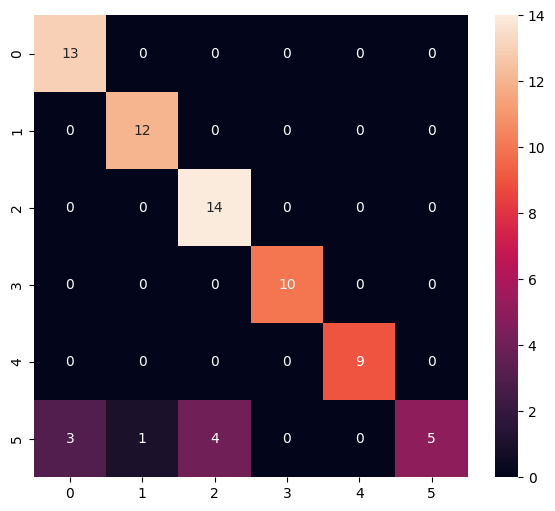

Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.92      1.00      0.96        12
           2       0.78      1.00      0.88        14
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      0.38      0.56        13

    accuracy                           0.89        71
   macro avg       0.92      0.90      0.88        71
weighted avg       0.91      0.89      0.87        71



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpfhwytsxp\assets


6364

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6290237e-01 2.3416484e-04 8.4338179e-05 2.7121617e-02 6.8792823e-04
 8.9695966e-03]
0
